In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

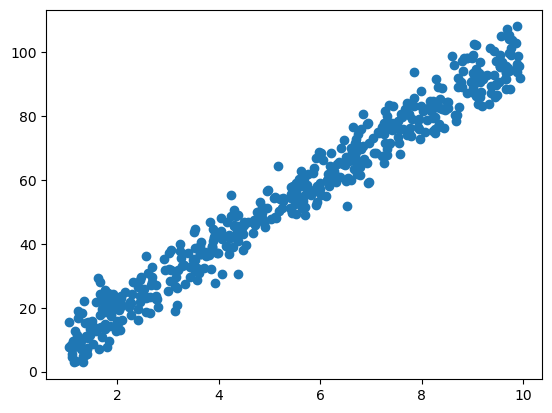

In [65]:
np.random.seed(42)

n_samples=500
X=np.random.uniform(1,10,n_samples)
noise=np.random.normal(0,5,n_samples)
y=10*X + noise
plt.scatter(X,y)

In [66]:
data=pd.DataFrame({
    "Hours Studied" : X,
    "Test Score" : y
})
data.head()

,Hours Studied,Test Score
0,4.370861,45.417391
1,9.556429,104.945142
2,7.587945,80.631574
3,6.387926,60.994745
4,2.404168,19.549604


In [67]:
X=data[['Hours Studied']]
Y=data['Test Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling Data

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)
print("Coefficient : ",model.coef_)
print("Intercept : ",model.intercept_)

Coefficient :  [27.31629308]
Intercept :  55.31588683514129


In [68]:
hours = np.array([[6]])
hours_scaled = scaler.transform(hours)  # Scale input
y_pred = model.predict(hours_scaled)

print("Predicted Score :", y_pred)

Predicted Score : [60.03282292]


c:\Users\hyder\.conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
y_pred = model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Model Evaluation Results:")
print("R² Score         :", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error :", rmse)

Model Evaluation Results:
R² Score         : 0.9645671742510007
Mean Absolute Error (MAE): 4.0743249615245745
Mean Squared Error (MSE) : 26.105427937987937
Root Mean Squared Error : 5.109347114650554


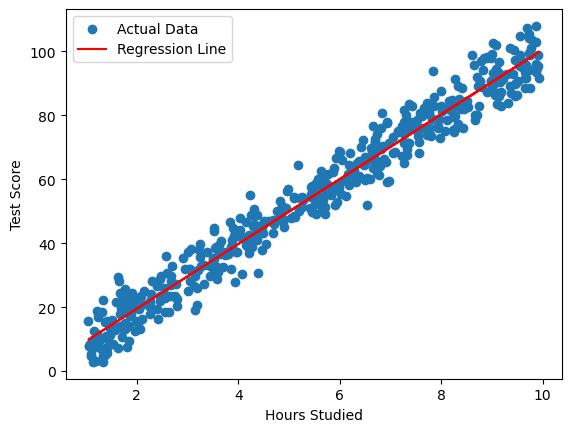

In [70]:
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(scaler.transform(X)), label='Regression Line' ,color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.legend()
plt.show()

In [71]:
joblib.dump(model , 'linear_model.pkl')
joblib.dump(scaler , 'scaler.pkl')

['scaler.pkl']

In [72]:
# Load saved model and scaler
loaded_model = joblib.load('linear_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example: Predict test score for 6 hours of study (or multiple features if applicable)
new_data = np.array([[6]])  # If only one feature: Hours Studied
# If 4 features, example: np.array([[6, 7, 85, 2]])

# Scale the input using loaded scaler
new_data_scaled = loaded_scaler.transform(new_data)

# Predict using loaded model
prediction = loaded_model.predict(new_data_scaled)
print("Predicted Score:", prediction)

Predicted Score: [60.03282292]


c:\Users\hyder\.conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
